In [463]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import time, psutil, os, math
from tqdm.contrib import itertools


data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(10)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [464]:
data.drop("id",inplace=True,axis=1)

In [465]:
print('Valori unice\n',data['gender'].unique())
print('Numărul pacinților în funcție de sex\n',data['gender'].value_counts())

Valori unice
 ['Male' 'Female' 'Other']
Numărul pacinților în funcție de sex
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [466]:
sns.countplot(data=data,x='gender')

<Axes: xlabel='gender', ylabel='count'>

<Axes: xlabel='gender', ylabel='count'>

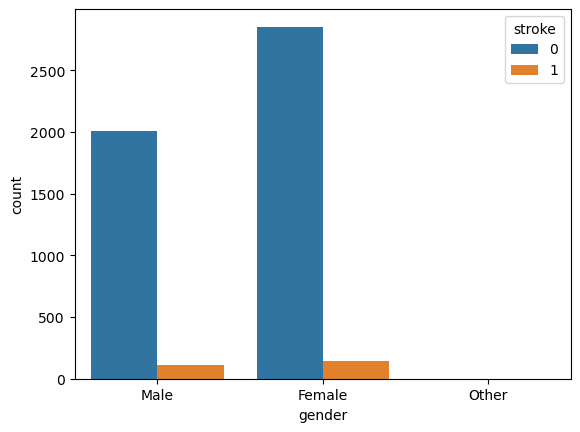

In [467]:
sns.countplot(data=data,x='gender',hue='stroke')

In [468]:

print('Valori unice\n',data['age'].nunique())

Valori unice
 104


In [469]:
sns.displot(data['age'])

<Axes: xlabel='stroke', ylabel='age'>

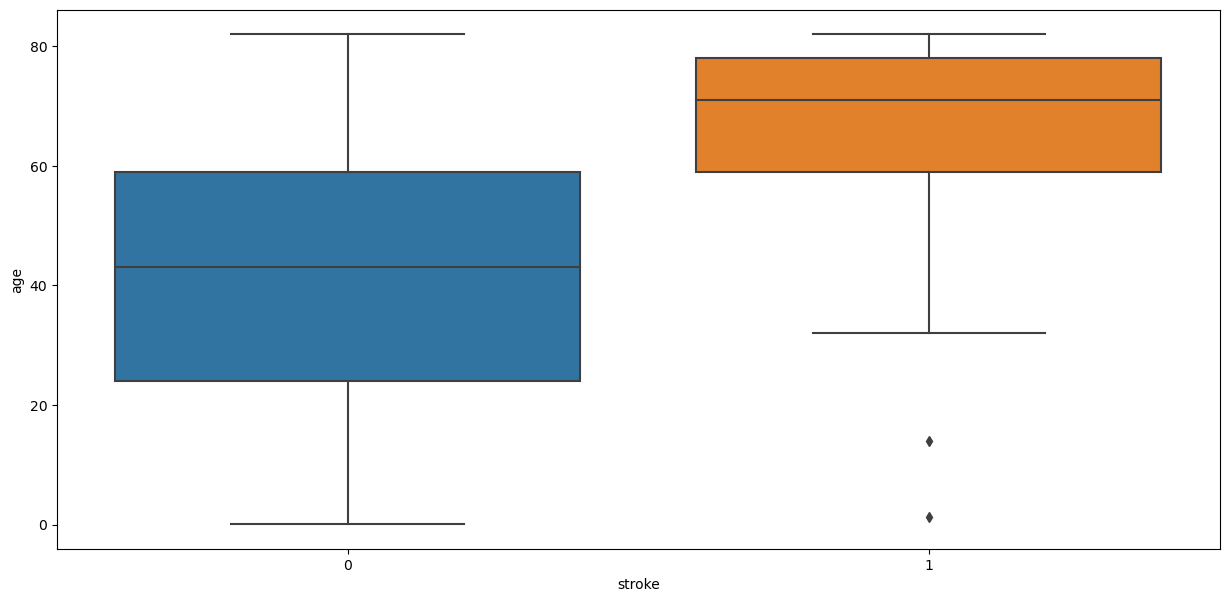

In [470]:
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='stroke',y='age')

In [471]:
print('Valori unice\n',data['hypertension'].unique())

Valori unice
 [0 1]


In [472]:
print('Numărul pacinților pe cazuri: fără(0) sau cu hipertensiune(1)\n',data['hypertension'].value_counts())

Numărul pacinților pe cazuri: fără(0) sau cu hipertensiune(1)
 0    4612
1     498
Name: hypertension, dtype: int64


In [473]:
sns.countplot(data=data,x='hypertension')

<Axes: xlabel='hypertension', ylabel='count'>

In [474]:
sns.countplot(data=data,x='hypertension',hue='stroke')

<Axes: xlabel='hypertension', ylabel='count'>

In [475]:
print('Valori unice\n',data['heart_disease'].unique())

Valori unice
 [1 0]


In [476]:
print('Numărul pacinților pe cazuri: fără(0) sau cu boli cardiace(1)\n',data['heart_disease'].value_counts())

Numărul pacinților pe cazuri: fără(0) sau cu boli cardiace(1)
 0    4834
1     276
Name: heart_disease, dtype: int64


<Axes: xlabel='heart_disease', ylabel='count'>

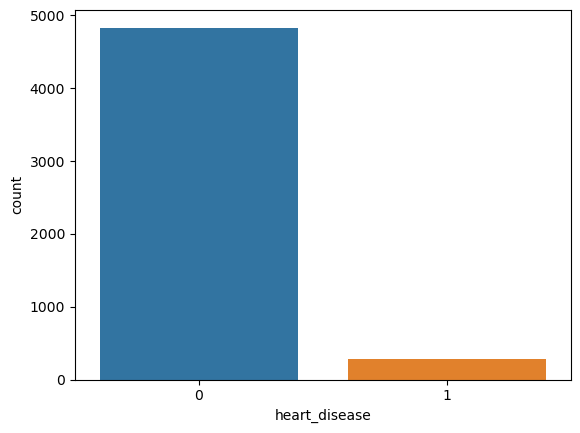

In [477]:
sns.countplot(data=data,x='heart_disease')

<Axes: xlabel='heart_disease', ylabel='count'>

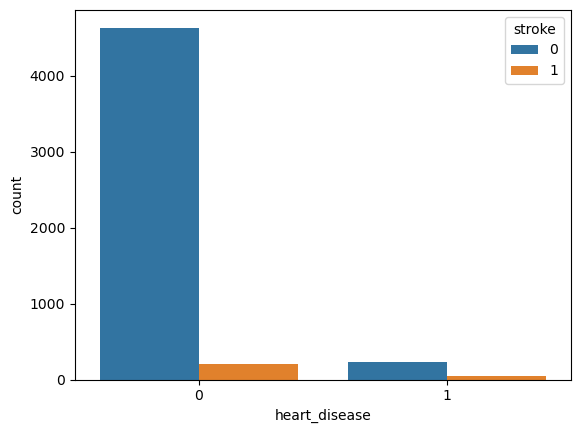

In [478]:
sns.countplot(data=data,x='heart_disease',hue='stroke')

In [479]:
print('Valori unice\n',data['ever_married'].unique())

Valori unice
 ['Yes' 'No']


In [480]:
print('Numărul pacinților pe cazuri: căsătoriți sau necăsătoriți\n',data['ever_married'].value_counts())


Numărul pacinților pe cazuri: căsătoriți sau necăsătoriți
 Yes    3353
No     1757
Name: ever_married, dtype: int64


In [481]:
sns.countplot(data=data,x='ever_married')

<Axes: xlabel='ever_married', ylabel='count'>

In [482]:
sns.countplot(data=data,x='ever_married',hue='stroke')

<Axes: xlabel='ever_married', ylabel='count'>

In [483]:
print('Valori unice\n',data['work_type'].unique())

Valori unice
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [484]:
print('Numărul pacinților pe cazuri:\n',data['work_type'].value_counts())

Numărul pacinților pe cazuri:
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


In [485]:
sns.countplot(data=data,x='work_type')

<Axes: xlabel='work_type', ylabel='count'>

In [486]:
sns.countplot(data=data,x='work_type',hue='stroke')

<Axes: xlabel='work_type', ylabel='count'>

In [487]:
print('Valori unice\n',data['Residence_type'].unique())

Valori unice
 ['Urban' 'Rural']


In [488]:
print('Numărul pacinților în funcție de mediul în care aceștia trăiesc:\n',data['Residence_type'].value_counts())

Numărul pacinților în funcție de mediul în care aceștia trăiesc:
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


<Axes: xlabel='Residence_type', ylabel='count'>

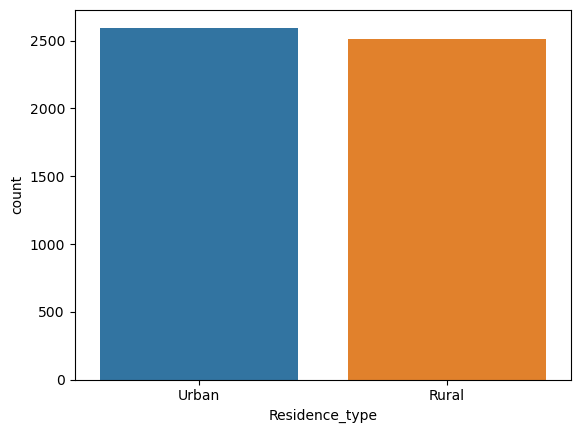

In [489]:
sns.countplot(data=data,x='Residence_type')

<Axes: xlabel='Residence_type', ylabel='count'>

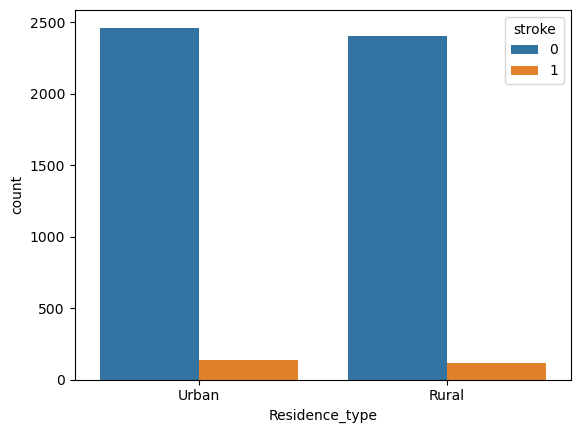

In [490]:
sns.countplot(data=data,x='Residence_type',hue='stroke')

In [491]:
data['avg_glucose_level'].nunique()

3979

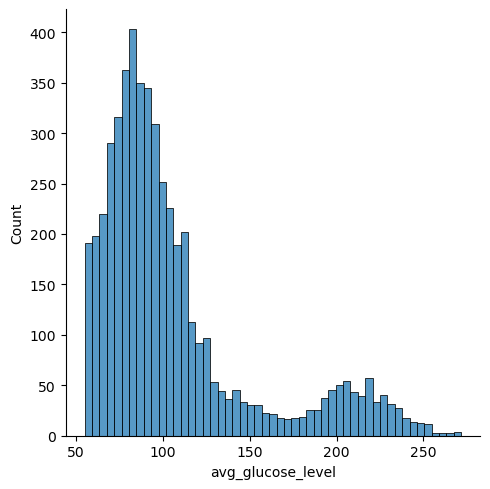

In [492]:
sns.displot(data['avg_glucose_level'])

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

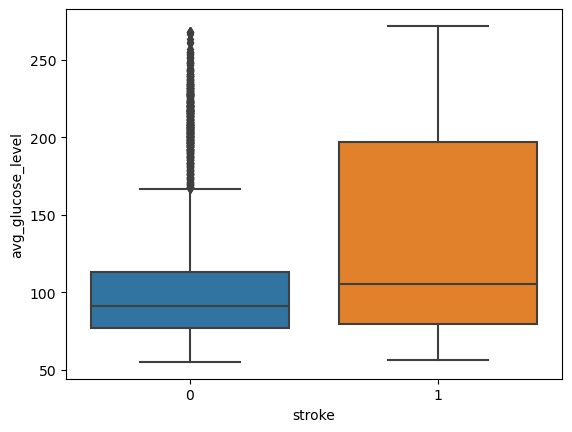

In [493]:
sns.boxplot(data=data,x='stroke',y='avg_glucose_level')

In [494]:
print('Valori nule\n',data['bmi'].isna().sum())

Valori nule
 201


In [495]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [496]:
print('Valori unice\n',data['bmi'].nunique())

Valori unice
 419


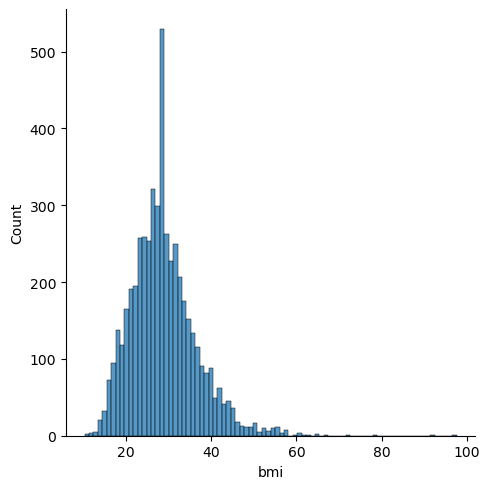

In [497]:
sns.displot(data['bmi'])

<Axes: xlabel='stroke', ylabel='bmi'>

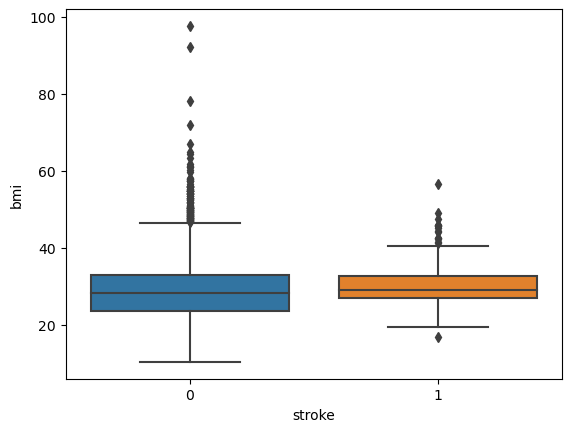

In [498]:
sns.boxplot(data=data,x='stroke',y='bmi')

In [499]:
print('Valori unice\n',data['smoking_status'].unique())

Valori unice
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [500]:
print('Numărul pacinților fumători și nefumători:\n',data['smoking_status'].value_counts())

Numărul pacinților fumători și nefumători:
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


<Axes: xlabel='smoking_status', ylabel='count'>

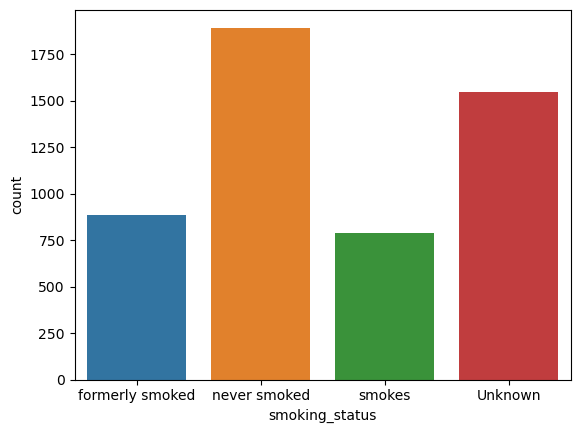

In [501]:
sns.countplot(data=data,x='smoking_status')

<Axes: xlabel='smoking_status', ylabel='count'>

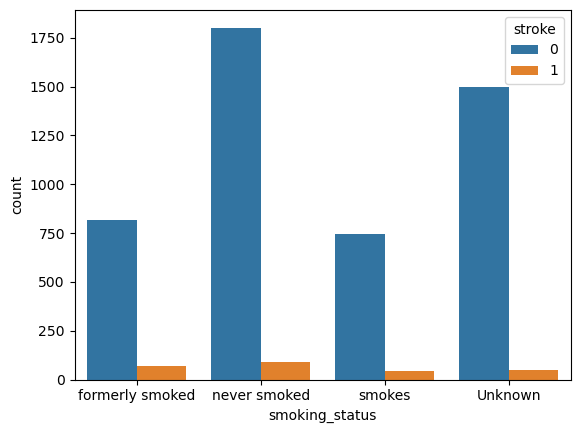

In [502]:
sns.countplot(data=data,x='smoking_status',hue='stroke')

In [503]:
print('Valori unice\n',data['stroke'].unique())

Valori unice
 [1 0]


In [504]:
print('Numărul pacinților cu și fără accident vascular cerebral:\n',data['stroke'].value_counts())

Numărul pacinților cu și fără accident vascular cerebral:
 0    4861
1     249
Name: stroke, dtype: int64


<Axes: xlabel='stroke', ylabel='count'>

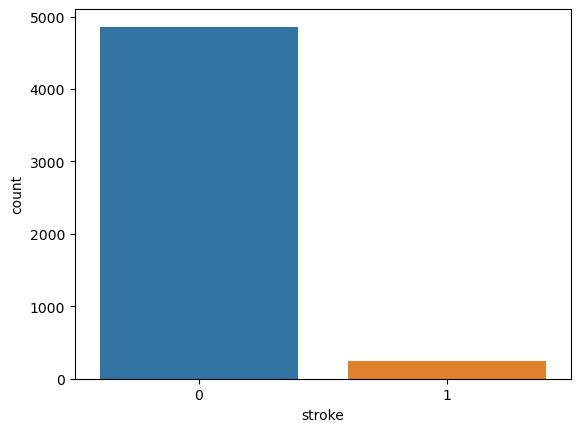

In [505]:
sns.countplot(data=data,x='stroke')

In [506]:
data

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0             Urban             228.69  36.600000  formerly smoked       1  
1             Rural             202.21  28.893237     never smoked       1  
2             Rural             105.92  32.500000     never smoked       1  
3             Urban             171.23  34.400000           smokes       1  
4             Rural             174.12  24.000000     never smoked       1  
...             ...                ...        ...              ...     ...  
5105          Urban              83.75  28.893237     never smoked       0  
5106          Urban             125.20  40.000000     never smoked       0  
5107          Rural              82.99  30.600000     never smoked       0  
5108          Rural             166.29  25.600000  formerly smoked       0  
5109          Urban              85.28  26.200000          Unknown       0  

[5110 rows x 11 columns]

In [507]:
final_df = data
y = final_df['stroke']
X = final_df.drop(columns=['stroke'])

In [508]:
X

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi   smoking_status  
0             Urban             228.69  36.600000  formerly smoked  
1             Rural             202.21  28.893237     never smoked  
2             Rural             105.92  32.500000     never smoked  
3             Urban             171.23  34.400000           smokes  
4             Rural             174.12  24.000000     never smoked  
...             ...                ...        ...              ...  
5105          Urban              83.75  28.893237     never smoked  
5106          Urban             125.20  40.000000     never smoked  
5107          Rural              82.99  30.600000     never smoked  
5108          Rural             166.29  25.600000  formerly smoked  
5109          Urban              85.28  26.200000          Unknown  

[5110 rows x 10 columns]

In [509]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [510]:
def logistic(x):
    y = 1 / (1 + np.exp(-x))
    return y

x, x_arr = 0, np.array([-5, -1, 1, 5])

logistic(0) = 0.5
logistic([-5 -1  1  5]) = [0.00669285 0.26894142 0.73105858 0.99330715]


In [511]:
def log_loss(y, y_dash):
    loss = - (y * np.log(y_dash)) - ((1 - y) * np.log(1 - y_dash))
    return loss

y, y_dash = 0, 0.6

log_loss(0, 0.6) = 0.916290731874155


In [512]:
def cost_func(y, y_dash):
    assert len(y) == len(y_dash), ""
    m = len(y)
    cost = 0
    for i in range(m):
        cost += log_loss(y[i], y_dash[i])
    cost = cost / m
    return cost

y, y_dash = np.array([0, 1, 0]), np.array([0.4, 0.6, 0.25])

cost_func([0 1 0], [0.4  0.6  0.25]) = 0.43644443999458743


In [513]:
def cost_logreg(X, y, w, b):
    m, n = X.shape
    assert len(y) == m, ""
    assert len(w) == n, ""
    z = []
    for i in range(m):
        s = 0
        for j in range(n):
            s += X[i, j] * w[j]
        z.append(s + b)
    z = np.array(z)
    y_dash = logistic(z)
    cost = cost_func(y, y_dash)
    return cost

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1

cost_logreg(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350784906


In [514]:
def grad_logreg_vec(X, y, w, b): 
    m, n = X.shape
    assert len(y) == m,
    assert len(w) == n,
    y_dash = logistic(np.matmul(X, w) + b * np.ones(m))
    grad_w = np.matmul(y_dash - y, X) / m
    grad_b = np.dot(y_dash - y, np.ones(m)) / m
    return grad_w, grad_b

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1

grad_logreg_vec(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = (array([-4.99991649,  4.99991649]), 0.4999916492890759)


In [515]:
def grad_desc(X, y, w, b, alpha, n_iter, show_cost = True, show_params = False): 
    m, n = X.shape
    assert len(y) == m, ""
    assert len(w) == n, ""
    cost_history, params_history = [], []
    for i, j in itertools.product(range(n_iter), range(1)):
        grad_w, grad_b = grad_logreg_vec(X, y, w, b)   
        w += - alpha * grad_w
        b += - alpha * grad_b
        cost =  cost_logreg(X, y, w, b)
        cost_history.append(cost)
        params_history.append([w, b])
        if show_cost == True and show_params == False and (i % math.ceil(n_iter / 10) == 0 or i == n_iter - 1):
            print(f"Iteration {i:6}:    Cost  {float(cost_history[i]):3.4f}")
        if show_cost == True and show_params == True and (i % math.ceil(n_iter / 10) == 0 or i == n_iter - 1):
            print(f"Iteration {i:6}:    Cost  {float(cost_history[i]):3.4f},    Params  {params_history[i]}")
    return w, b, cost_history, params_history

X, y, w, b, alpha, n_iter = np.array([[0.1, 0.2], [-0.1, 0.1]]), np.array([1, 0]), np.array([0., 0.]), 0., 0.1, 100000
w_out, b_out, cost_history, params_history = grad_desc(X, y, w, b, alpha, n_iter, show_cost = True, show_params = True)

  0%|          | 0/100000 [00:00<?, ?it/s]

Iteration      0:    Cost  0.6928,    Params  [array([0.005 , 0.0025]), 0.0]


 15%|█▍        | 14977/100000 [00:00<00:03, 25071.68it/s]

Iteration  10000:    Cost  0.0867,    Params  [array([19.30073125,  9.43918518]), -1.407869658536168]


 25%|██▌       | 25297/100000 [00:01<00:02, 25693.03it/s]

Iteration  20000:    Cost  0.0430,    Params  [array([25.11290735, 12.28127422]), -1.8345297190719225]


 30%|███       | 30477/100000 [00:01<00:02, 25445.91it/s]

Iteration  30000:    Cost  0.0283,    Params  [array([28.51960605, 13.947125  ]), -2.084520137444322]


 46%|████▌     | 45968/100000 [00:02<00:02, 22604.69it/s]

Iteration  40000:    Cost  0.0211,    Params  [array([30.9258698 , 15.12377399]), -2.2610727540006015]


 56%|█████▌    | 56186/100000 [00:02<00:01, 24618.25it/s]

Iteration  50000:    Cost  0.0168,    Params  [array([32.78441957, 16.03259549]), -2.397428663482232]


 64%|██████▎   | 63689/100000 [00:02<00:01, 24329.01it/s]

Iteration  60000:    Cost  0.0139,    Params  [array([34.29765304, 16.77255979]), -2.508444865872566]


 74%|███████▍  | 74164/100000 [00:03<00:00, 25892.22it/s]

Iteration  70000:    Cost  0.0119,    Params  [array([35.57340822, 17.39639871]), -2.6020359756178215]


 85%|████████▍ | 84677/100000 [00:03<00:00, 26023.87it/s]

Iteration  80000:    Cost  0.0104,    Params  [array([36.67589743, 17.93551157]), -2.6829142826174595]


 95%|█████████▌| 95106/100000 [00:04<00:00, 25524.56it/s]

Iteration  90000:    Cost  0.0092,    Params  [array([37.64642667, 18.4100967 ]), -2.7541108549220765]


100%|██████████| 100000/100000 [00:04<00:00, 23647.14it/s]

Iteration  99999:    Cost  0.0083,    Params  [array([38.51304248, 18.83386869]), -2.8176836626325827]


# Preprocessing


### Label Encoding

In [516]:
le = preprocessing.LabelEncoder()
le.fit(data['smoking_status'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


In [517]:
le = preprocessing.LabelEncoder()
le.fit(data['work_type'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}


In [518]:
le = preprocessing.LabelEncoder()
le.fit(data['Residence_type'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Rural': 0, 'Urban': 1}


In [519]:
le = preprocessing.LabelEncoder()
le.fit(data['gender'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Female': 0, 'Male': 1, 'Other': 2}


In [520]:
le = preprocessing.LabelEncoder()
label = le.fit_transform(data['smoking_status'])
data.drop('smoking_status', axis = 1, inplace=True)
data['smoking_status'] = label
data.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi  stroke  smoking_status  
0          Urban             228.69  36.600000       1               1  
1          Rural             202.21  28.893237       1               2  
2          Rural             105.92  32.500000       1               2  
3          Urban             171.23  34.400000       1               3  
4          Rural             174.12  24.000000       1               2

In [521]:
le = preprocessing.LabelEncoder()
label = le.fit_transform(data['ever_married'])
data['ever_married_numerical'] = label
data.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi  stroke  smoking_status  \
0          Urban             228.69  36.600000       1               1   
1          Rural             202.21  28.893237       1               2   
2          Rural             105.92  32.500000       1               2   
3          Urban             171.23  34.400000       1               3   
4          Rural             174.12  24.000000       1               2   

   ever_married_numerical  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1

In [522]:
le = preprocessing.LabelEncoder()
label = le.fit_transform(data['work_type'])
data['work_type_numerical'] = label
data.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi  stroke  smoking_status  \
0          Urban             228.69  36.600000       1               1   
1          Rural             202.21  28.893237       1               2   
2          Rural             105.92  32.500000       1               2   
3          Urban             171.23  34.400000       1               3   
4          Rural             174.12  24.000000       1               2   

   ever_married_numerical  work_type_numerical  
0                       1                    2  
1                       1                    3  
2                       1                    2  
3                       1                    2  
4                       1                    3

In [523]:
data

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi  stroke  smoking_status  \
0             Urban             228.69  36.600000       1               1   
1             Rural             202.21  28.893237       1               2   
2             Rural             105.92  32.500000       1               2   
3             Urban             171.23  34.400000       1               3   
4             Rural             174.12  24.000000       1               2   
...             ...                ...        ...     ...             ...   
5105          Urban              83.75  28.893237       0               2   
5106          Urban             125.20  40.000000       0               2   
5107          Rural              82.99  30.600000       0               2   
5108          Rural             166.29  25.600000       0               1   
5109          Urban              85.28  26.200000       0               0   

      ever_married_numerical  work_type_numerical  
0                          1                    2  
1                          1                    3  
2                          1                    2  
3                          1                    2  
4                          1                    3  
...                      ...                  ...  
5105                       1                    2  
5106                       1                    3  
5107                       1                    3  
5108                       1                    2  
5109                       1                    0  

[5110 rows x 13 columns]

In [524]:
data.drop(columns=['gender', 'ever_married', 'work_type', 'smoking_status' ,'Residence_type','ever_married_numerical'],inplace=True)

In [576]:
y = final_df['stroke']
X = final_df.drop(columns=['stroke'])

In [772]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.6)
X_sampled, y_sampled = undersample.fit_resample(X, y)

In [773]:
X_train,X_test,y_train,y_test = train_test_split(X_sampled,y_sampled,test_size=0.2,random_state=99)

In [774]:
X_train

age  hypertension  heart_disease  avg_glucose_level   bmi  \
245  49.00             0              0             215.81  58.1   
341  51.00             0              0             105.36  43.7   
258   5.00             0              0             123.49  19.5   
610  59.00             0              0             200.62  35.8   
307  64.00             0              0              55.64  43.4   
..     ...           ...            ...                ...   ...   
68   79.00             1              1             205.23  22.0   
168  26.00             0              0              55.62  25.8   
185  53.00             0              0              86.25  29.3   
35    1.32             0              0              81.05  18.7   
641  81.00             0              0             184.40  27.5   

     work_type_numerical  
245                    3  
341                    2  
258                    4  
610                    2  
307                    2  
..                   ...  
68                     3  
168                    2  
185                    2  
35                     4  
641                    2  

[531 rows x 6 columns]

In [775]:
for col in X_train.columns:
    if (X_train[col].dtypes == 'int64' or X_train[col].dtypes == 'float64') and X_train[col].nunique() > 1:
        X_train[col] = (X_train[col] - X_train[col].min()) / (X_train[col].max() - X_train[col].min())
for col in X_test.columns:
    if (X_test[col].dtypes == 'int64' or X_test[col].dtypes == 'float64') and X_test[col].nunique() > 1:
        X_test[col] = (X_test[col] - X_test[col].min()) / (X_test[col].max() - X_test[col].min())

In [776]:
X_train

age  hypertension  heart_disease  avg_glucose_level       bmi  \
245  0.595191           0.0            0.0           0.759473  1.000000   
341  0.619725           0.0            0.0           0.236311  0.672727   
258  0.055447           0.0            0.0           0.322186  0.122727   
610  0.717861           0.0            0.0           0.687524  0.493182   
307  0.779195           0.0            0.0           0.000805  0.665909   
..        ...           ...            ...                ...       ...   
68   0.963199           1.0            1.0           0.709360  0.179545   
168  0.313052           0.0            0.0           0.000710  0.265909   
185  0.644259           0.0            0.0           0.145794  0.345455   
35   0.010304           0.0            0.0           0.121163  0.104545   
641  0.987733           0.0            0.0           0.610695  0.304545   

     work_type_numerical  
245                 0.75  
341                 0.50  
258                 1.00  
610                 0.50  
307                 0.50  
..                   ...  
68                  0.75  
168                 0.50  
185                 0.50  
35                  1.00  
641                 0.50  

[531 rows x 6 columns]

# Model Fitting

In [796]:
w_init = np.array([1.13705128, 0.80152296, 0.7327829, 0.33626751, -0.43079832, -0.90108293]).astype(float)
b_init = -3.2621313706817694

In [798]:
w_out, b_out, cost_history, params_history = grad_desc(X_train.to_numpy(), y_train.to_numpy(), w = w_init, b = b_init, alpha = 0.01, n_iter = 2000)

  3%|▎         | 62/2000 [00:00<00:06, 321.53it/s]

Iteration      0:    Cost  0.4657


 13%|█▎        | 256/2000 [00:00<00:04, 382.50it/s]

Iteration    200:    Cost  0.4624


 23%|██▎       | 452/2000 [00:01<00:04, 385.07it/s]

Iteration    400:    Cost  0.4614


 32%|███▏      | 647/2000 [00:01<00:03, 349.66it/s]

Iteration    600:    Cost  0.4611


 44%|████▍     | 878/2000 [00:02<00:02, 377.64it/s]

Iteration    800:    Cost  0.4609


 54%|█████▍    | 1081/2000 [00:02<00:02, 398.33it/s]

Iteration   1000:    Cost  0.4607


 62%|██████▏   | 1243/2000 [00:03<00:01, 402.68it/s]

Iteration   1200:    Cost  0.4605


 75%|███████▍  | 1496/2000 [00:03<00:01, 416.69it/s]

Iteration   1400:    Cost  0.4604


 83%|████████▎ | 1664/2000 [00:04<00:00, 415.27it/s]

Iteration   1600:    Cost  0.4602


 94%|█████████▎| 1874/2000 [00:04<00:00, 416.36it/s]

Iteration   1800:    Cost  0.4601


100%|██████████| 2000/2000 [00:05<00:00, 390.08it/s]

Iteration   1999:    Cost  0.4600


# Prediction and Evaluation

In [780]:
def conf_mat(y_test, y_pred):
    y_test, y_pred = list(y_test), list(y_pred)
    count, labels, confusion_mat = len(y_test), [0, 1], np.zeros(shape = (2, 2), dtype = int)
    for i in range(2):
        for j in range(2):
            confusion_mat[i][j] = len([k for k in range(count) if y_test[k] == labels[i] and y_pred[k] == labels[j]])
    return confusion_mat

In [800]:
def conf_mat_heatmap(y_test, y_pred):
    confusion_mat = conf_mat(y_test, y_pred)
    labels, confusion_mat_df = [0, 1], pd.DataFrame(confusion_mat, range(2), range(2))
    plt.figure(figsize = (6, 4.75))
    sns.heatmap(confusion_mat_df, annot = True, annot_kws = {"size": 16}, fmt = 'd')
    plt.xticks([0.5, 1.5], labels, rotation = 'horizontal')
    plt.yticks([0.5, 1.5], labels, rotation = 'horizontal')
    plt.xlabel("Predicted label", fontsize = 14)
    plt.ylabel("True label", fontsize = 14)
    plt.title("Confusion Matrix", fontsize = 14)
    plt.grid(False)
    plt.show()

In [803]:
def accuracy(y_test, y_pred):
    confusion_mat = conf_mat(y_test, y_pred)
    num = confusion_mat[0, 0] + confusion_mat[1, 1]
    denom = num + confusion_mat[0, 1] + confusion_mat[1, 0]
    acc = num / denom
    return acc

In [804]:
y_train_prob = logistic(np.matmul(X_train.to_numpy(), w_out) + (b_out * np.ones(X_train.shape[0])))
y_test_prob = logistic(np.matmul(X_test.to_numpy(), w_out) + (b_out * np.ones(X_test.shape[0])))
y_train_pred, y_test_pred = (y_train_prob > 0.5).astype(int), (y_test_prob > 0.5).astype(int)
print(pd.Series({"Training accuracy": accuracy(y_train, y_train_pred),
                 "Test accuracy": accuracy(y_test, y_test_pred)}).to_string())

Training accuracy    0.783427
Test accuracy        0.804511


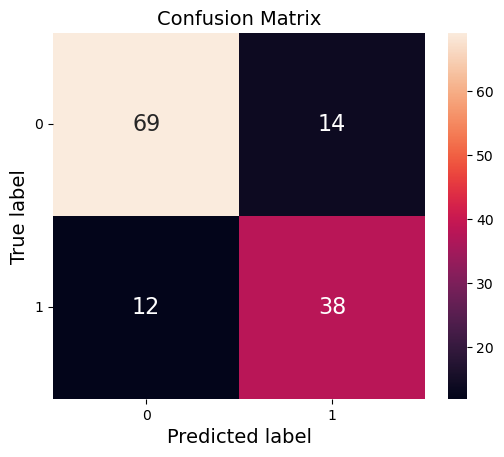

In [807]:
conf_mat_heatmap(y_test, y_test_pred)